In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import tdt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import xarray as xr

import kdephys.hypno as kh
import kdephys.pd as kpd
import kdephys.xr as kx
import kdephys.utils as ku
import kdephys.ssfm as ss

import acr
import plotly.express as px
import acr.info_pipeline as aip

/home/kdriessen/github_t2/kdephys/kdephys/xr/utils.py:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


# ACR_12 Scratch

In [26]:
from telnetlib import SB

def rec_checker(subject, recs, time, channel=14, store='LFP_', type='block'):
    info = aip.load_subject_info(subject)
    if type == 'block':
        for rec in recs:
            duration = int(info['rec_times'][rec]['duration'])
            t1 = int(duration-time)
            t2=0
            path = info['paths'][rec]
            data = kx.io.get_data(path, t1=t1, t2=0, store=store, channel=[channel])
            #data = data.swap_dims({'datetime':'time'}).sel(channel=channel)
            f, ax = plt.subplots(figsize=(20,5))
            ax.plot(data.time, data)
            ax.set_title(rec)
    return

In [21]:
i = aip.load_subject_info('ACR_12')
int(i['rec_times']['control1-bl']['duration'])

86262

In [25]:
kx.io.get_data('/Volumes/opto_loc/Data/ACR_12/ACR_12-control1-bl/', t1=86258, t2=86260, store='LFP_', channel=[14])

read from t=86258s to t=86262.5s
Using 610.3516 Hz as SEV sampling rate for LFP_


/home/kdriessen/miniconda3/envs/acr/lib/python3.10/site-packages/tdt/TDTbin2py.py:550: RuntimeWarning: overflow encountered in ulong_scalars
  data[varname]['data'][jj] = np.zeros((len(channels), absolute_end_sample[jj] - absolute_start_sample[jj] + np.uint64(2 + this_start_sample)), dtype=data_format)


ValueError: Maximum allowed dimension exceeded

read from t=99442s to t=99445.86s
Using 610.3516 Hz as SEV sampling rate for LFP_
read from t=86337s to t=86340.14s
Using 610.3516 Hz as SEV sampling rate for LFP_
read from t=93686s to t=93689.19s
Using 610.3516 Hz as SEV sampling rate for LFP_


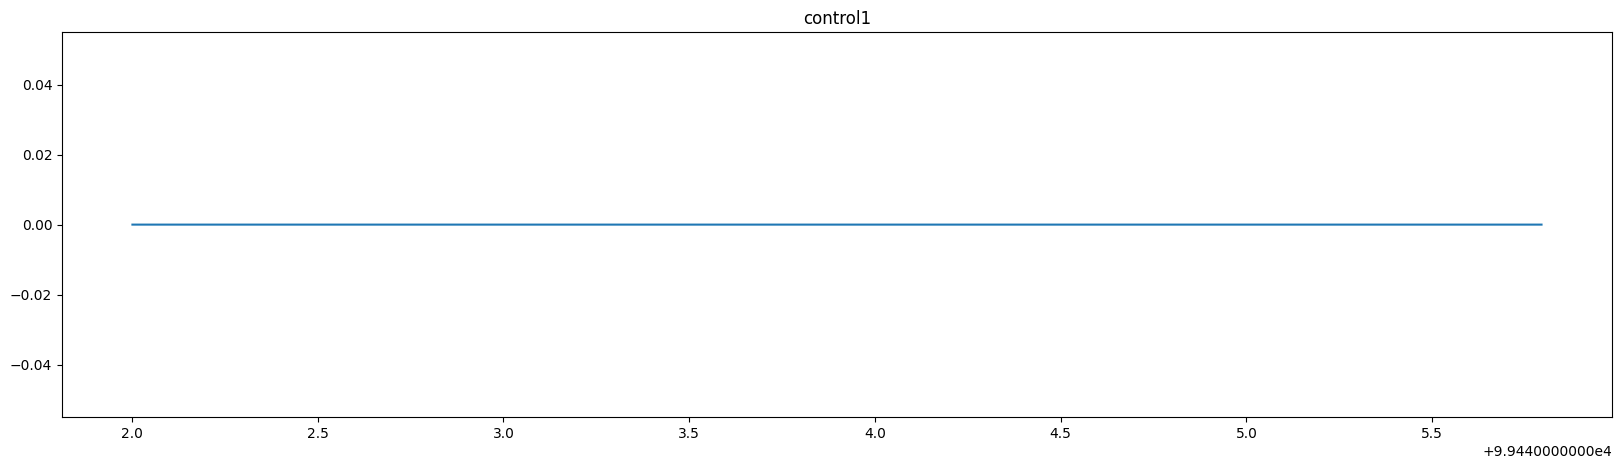

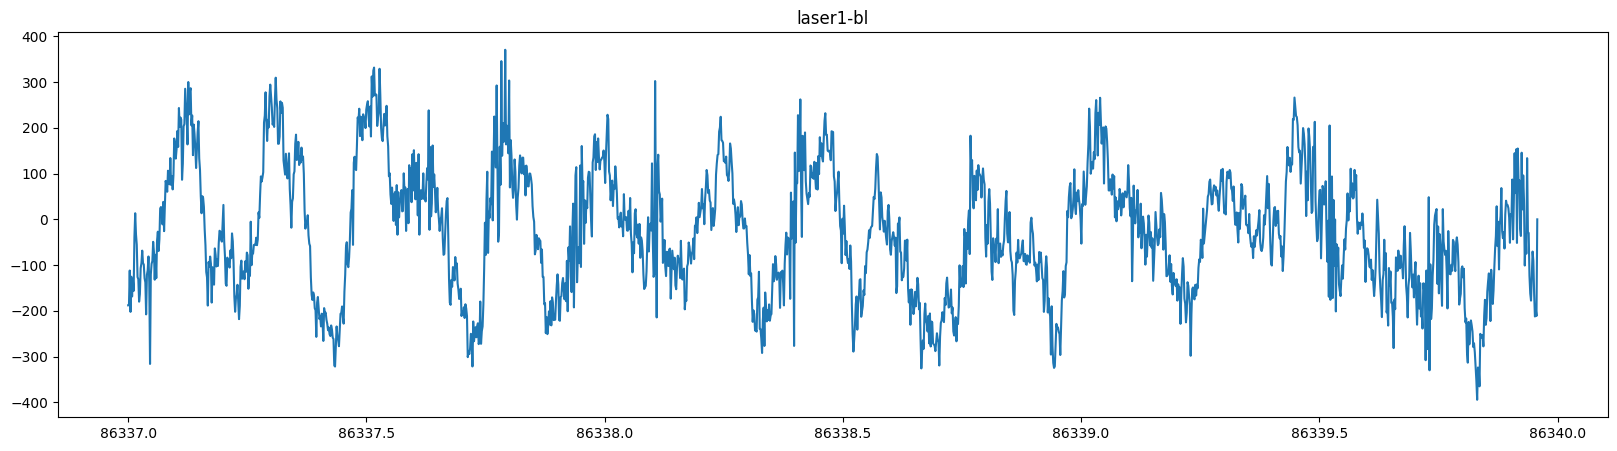

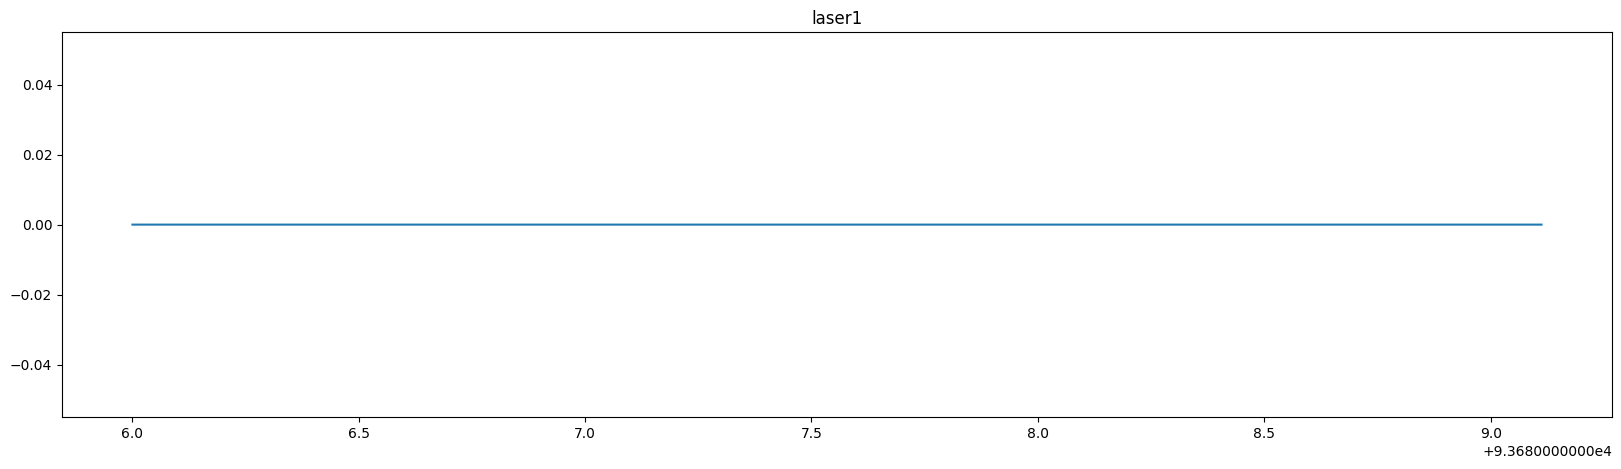

In [27]:
rec_checker('ACR_12', ['control1', 'laser1-bl', 'laser1'], 3, channel=14, store='LFP_', type='block')

(<Figure size 2500x1000 with 1 Axes>, <AxesSubplot:>)

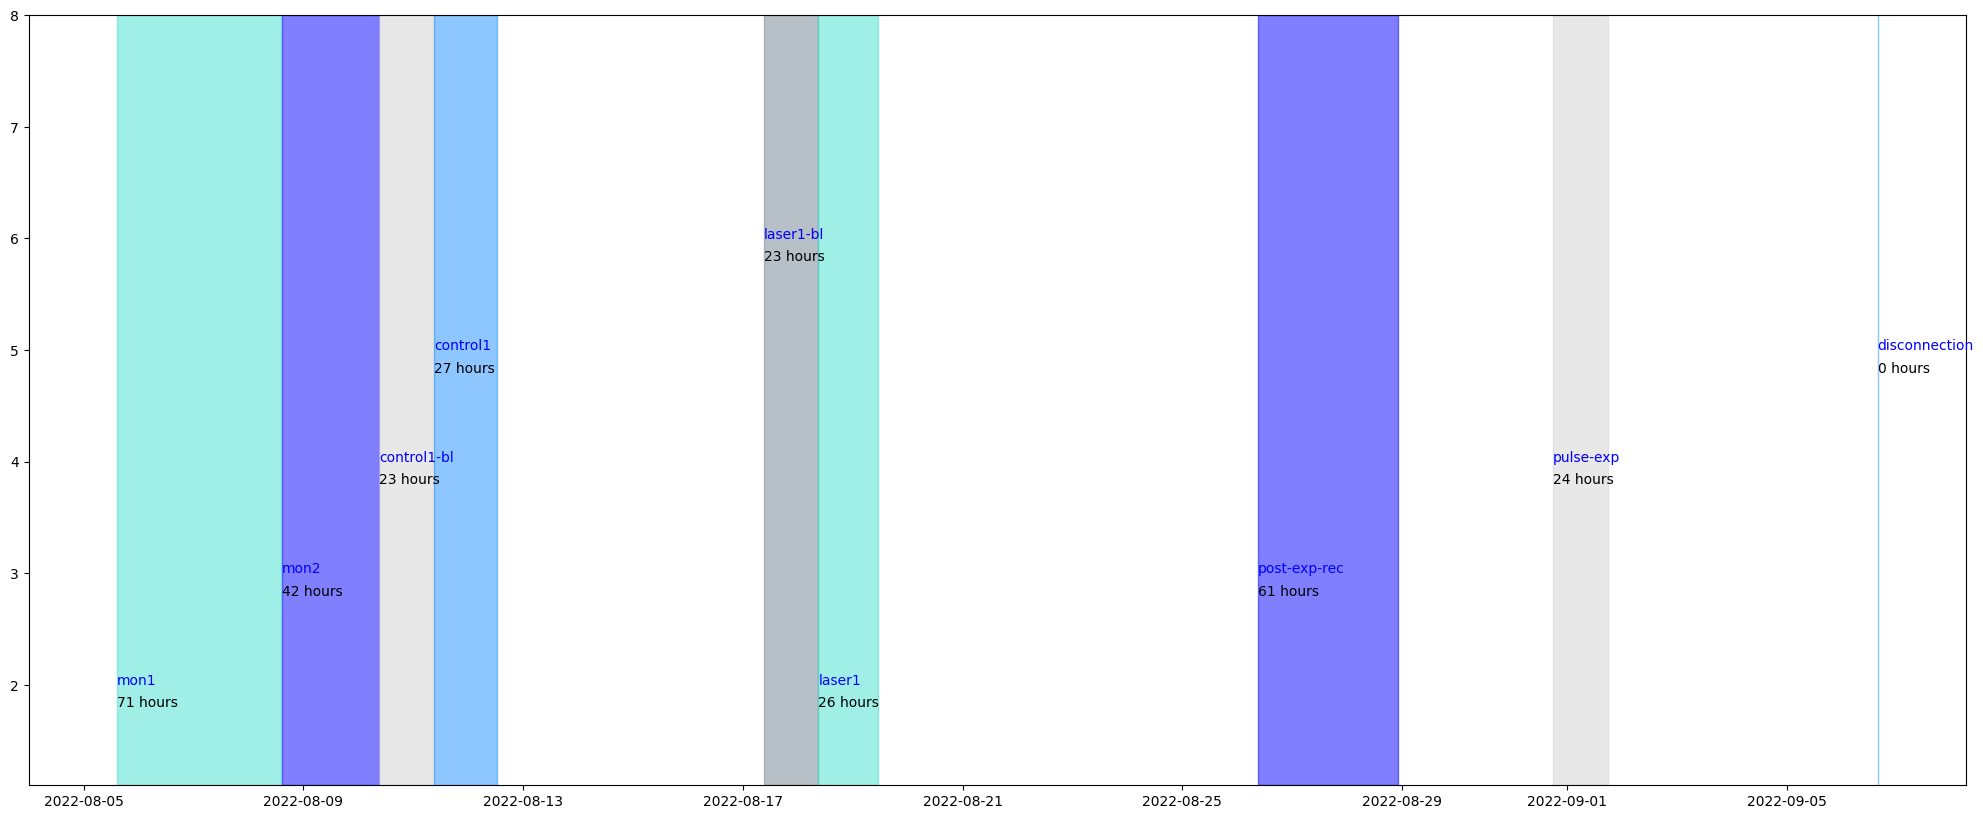

In [3]:
aip.data_range_plot('ACR_12')

read from t=0s to t=1557.03s
read from t=0s to t=2982.67s
read from t=0s to t=1679.86s
read from t=0s to t=1572.34s
read from t=0s to t=2589.87s
read from t=0s to t=1651.55s
read from t=0s to t=510.5s
read from t=0s to t=1617.32s
read from t=0s to t=1567.1s
read from t=0s to t=93689.19s
read from t=0s to t=87428.01s


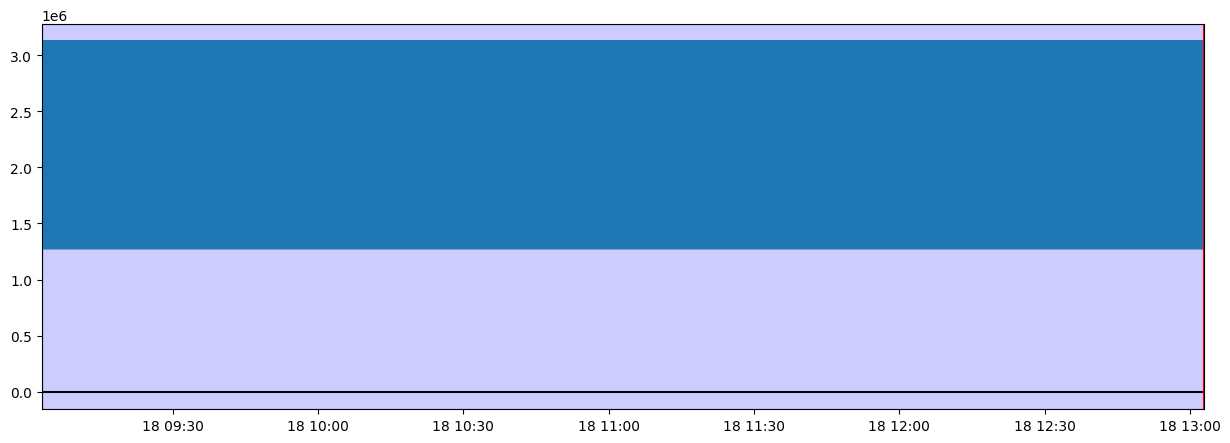

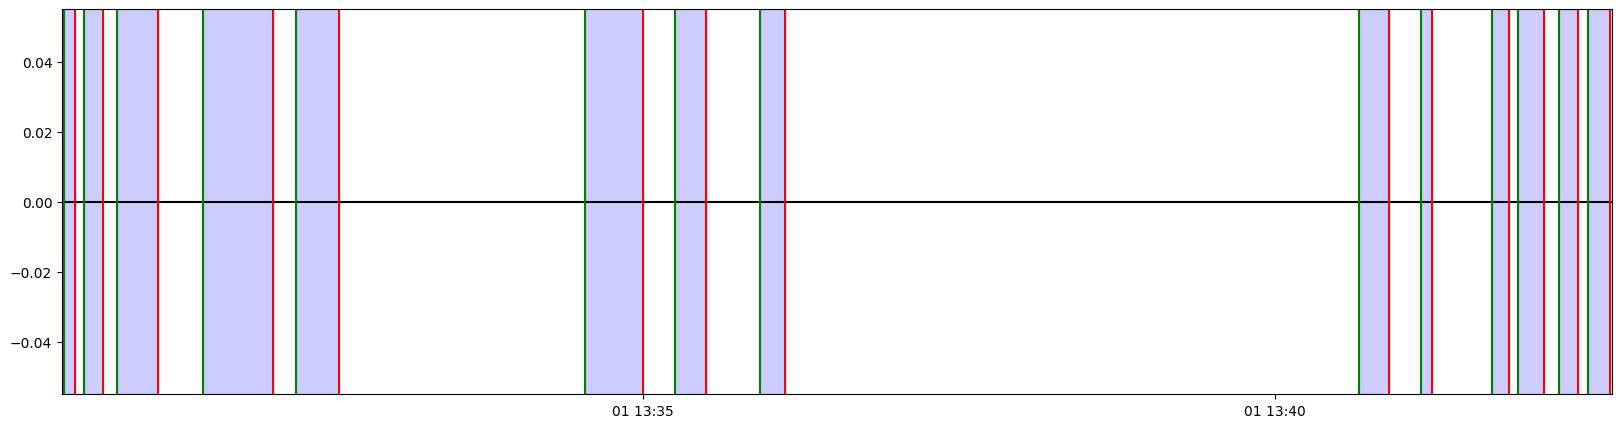

In [2]:
params = {}
params["subject"] = "ACR_12"
params["raw_stores"] = ["NNXr", "EEGr", "EMGr"]
params["lite_stores"] = ["EEG_", "EMGr", "LFP_"]

params["preprocess-list"] = [
    "laser1-bl",
    "laser1",
    "control1-bl",
    "control1",
    "pulse-exp"
]

params["channels"] = {
    "NNXr": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "EEGr": [1, 2],
    "EMGr": [1, 2],
    "EEG_": [1, 2],
    "LFP_": [2, 6, 10, 14],
}

params["stim-exps"] = {"laser1": "Wav2", "pulse-exp": "Bttn"}

aip.subject_info_gen(params)
aip.stim_info_to_yaml(params["subject"], params["stim-exps"])

read from t=0s to t=93689.19s
read from t=0s to t=87428.01s


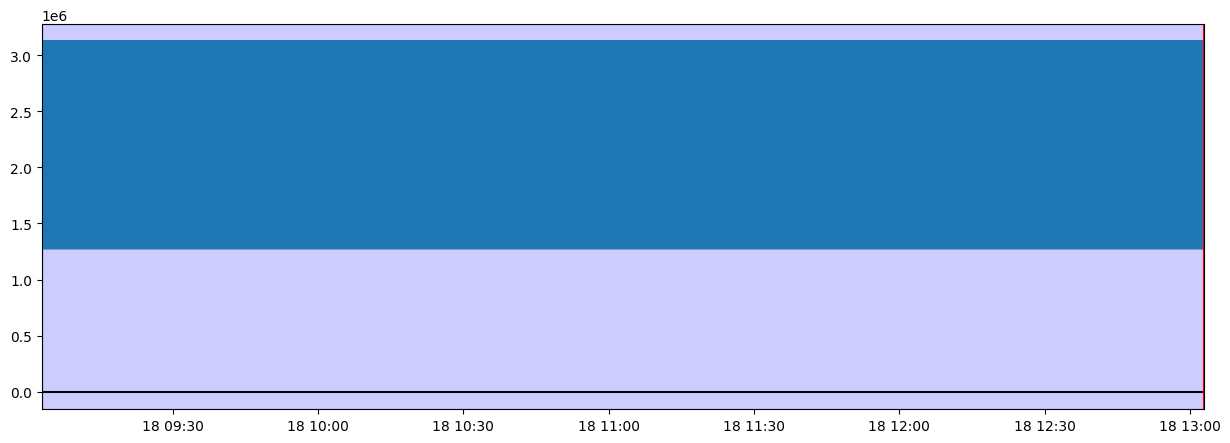

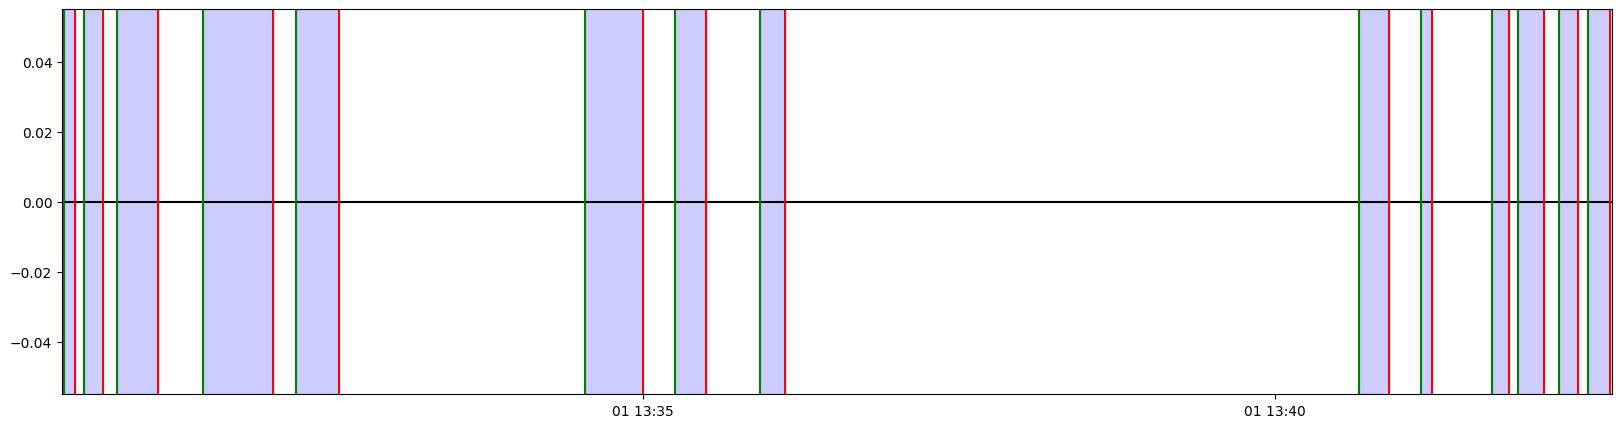

In [27]:
exps = {"laser1": "Wav2", "pulse-exp": "Bttn"}
aip.stim_info_to_yaml('ACR_12', exps)

In [30]:
start = np.datetime64('2022-09-12T07:06:40.999999')
lon = np.datetime64('2022-09-12T11:29:25.024208520')
(lon-start)/np.timedelta64(1, 's')

15764.02420952

In [31]:
37450+15764

53214